One common type of visualization in data science is that of geographic data. Matplotlib’s main tool for this type of visualization is the Basemap toolkit, which is one of several Matplotlib toolkits which lives under the mpl_toolkits namespace. Admittedly, Basemap feels a bit clunky to use, and often even simple visualizations take much longer to render than you might hope. More modern solutions such as leaflet or the Google Maps API may be a better choice for more intensive map visualizations. Still, Basemap is a useful tool for Python users to have in their virtual toolbelts. In this section, we’ll show several examples of the type of map visualization that is possible with this toolkit.

Installation of Basemap is straightforward; if you’re using conda you can type this and the package will be downloaded:
`pip install basemap`

In [8]:
# Importing libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset
import folium


ModuleNotFoundError: No module named 'netCDF4'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0000000000000002].


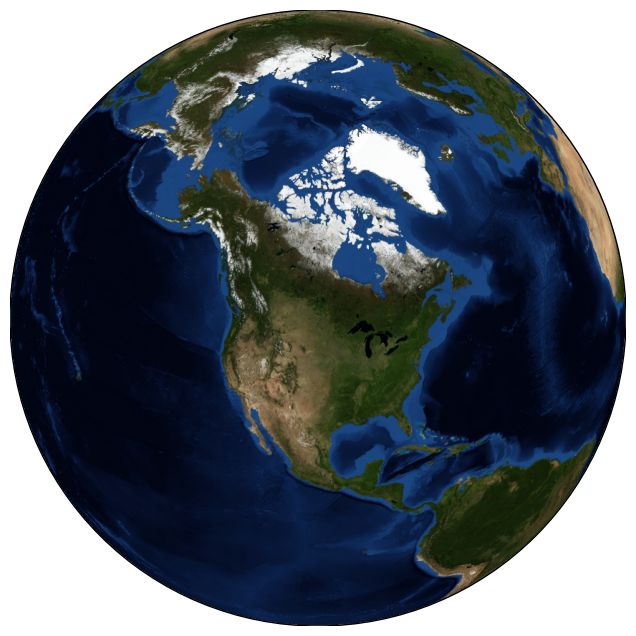

In [ ]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0000000000000002].


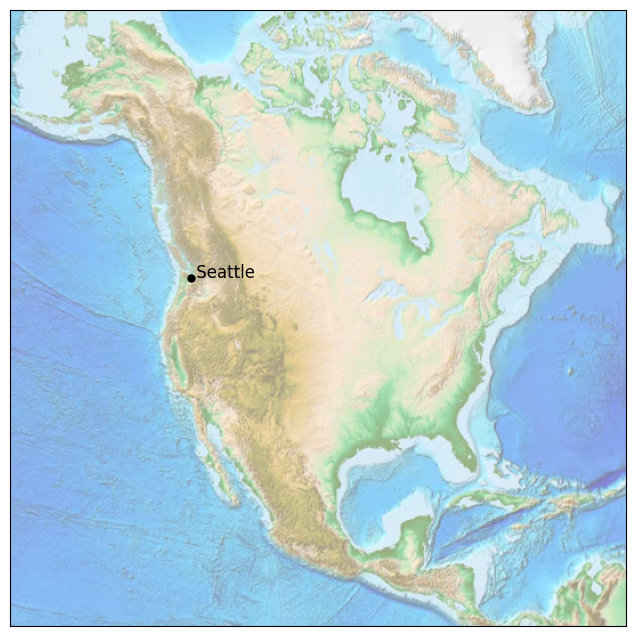

In [ ]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=45, lon_0=-100,)
m.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting
x, y = m(-122.3, 47.6)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, ' Seattle', fontsize=12)

#### Map Projections

The first thing to decide when using maps is what projection to use. You’re probably familiar with the fact that it is impossible to project a spherical map, such as that of the Earth, onto a flat surface without somehow distorting it or breaking its continuity. These projections have been developed over the course of human history, and there are a lot of choices! Depending on the intended use of the map projection, there are certain map features (e.g., direction, area, distance, shape, or other considerations) that are useful to maintain.

The Basemap package implements several dozen such projections, all referenced by a short format code. Here we’ll briefly demonstrate some of the more common ones.

We’ll start by defining a convenience routine to draw our world map along with the longitude and latitude lines:In [4]


In [ ]:
from itertools import chain

def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

#### Cylindrical projections 

The simplest of map projections are cylindrical projections, in which lines of constant latitude and longitude are mapped to horizontal and vertical lines, respectively. This type of mapping represents equatorial regions quite well, but results in extreme distortions near the poles. The spacing of latitude lines varies between different cylindrical projections, leading to different conservation properties, and different distortion near the poles. In the following figure we show an example of the equidistant cylindrical projection, which chooses a latitude scaling that preserves distances along meridians. Other cylindrical projections are the Mercator (projection='merc') and the cylindrical equal area (projection='cea') projections.

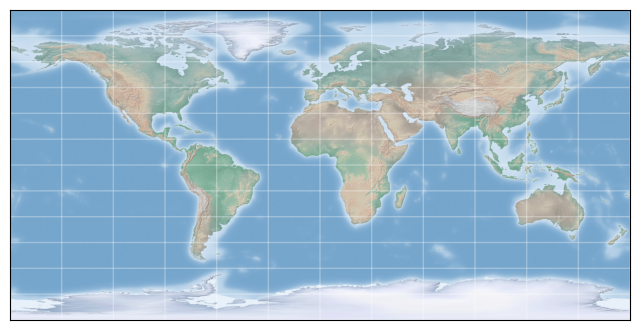

In [ ]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
draw_map(m)

### Pseudo-cylindrical projections

Pseudo-cylindrical projections relax the requirement that meridians (lines of constant longitude) remain vertical; this can give better properties near the poles of the projection. The Mollweide projection (projection='moll') is one common example of this, in which all meridians are elliptical arcs. It is constructed so as to preserve area across the map: though there are distortions near the poles, the area of small patches reflects the true area. Other pseudo-cylindrical projections are the sinusoidal (projection='sinu') and Robinson (projection='robin') projections.

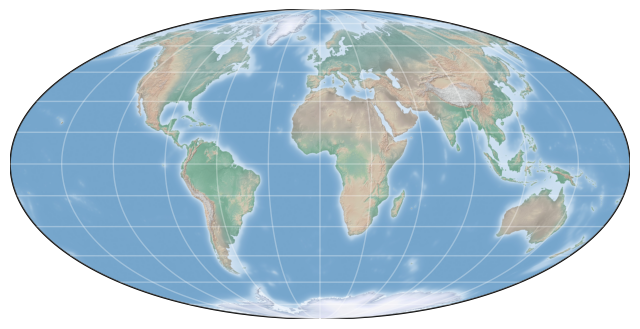

In [ ]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='moll', resolution=None,
            lat_0=0, lon_0=0)
draw_map(m)

### Perspective projections
Perspective projections are constructed using a particular choice of perspective point, similar to if you photographed the Earth from a particular point in space (a point which, for some projections, technically lies within the Earth!). One common example is the orthographic projection (projection='ortho'), which shows one side of the globe as seen from a viewer at a very long distance. As such, it can show only half the globe at a time. Other perspective-based projections include the gnomonic projection (projection='gnom') and stereographic projection (projection='stere'). These are often the most useful for showing small portions of the map.

Here is an example of the orthographic projection

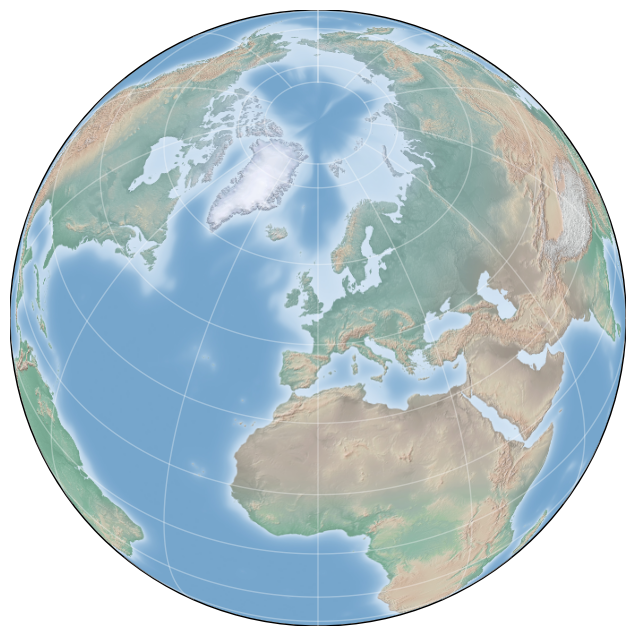

In [ ]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None,
            lat_0=50, lon_0=0)
draw_map(m)

### Conic projections
A Conic projection projects the map onto a single cone, which is then unrolled. This can lead to very good local properties, but regions far from the focus point of the cone may become very distorted. One example of this is the Lambert Conformal Conic projection (projection='lcc'), which we saw earlier in the map of North America. It projects the map onto a cone arranged in such a way that two standard parallels (specified in Basemap by lat_1 and lat_2) have well-represented distances, with scale decreasing between them and increasing outside of them. Other useful conic projections are the equidistant conic projection (projection='eqdc') and the Albers equal-area projection (projection='aea'). Conic projections, like perspective projections, tend to be good choices for representing small to medium patches of the globe

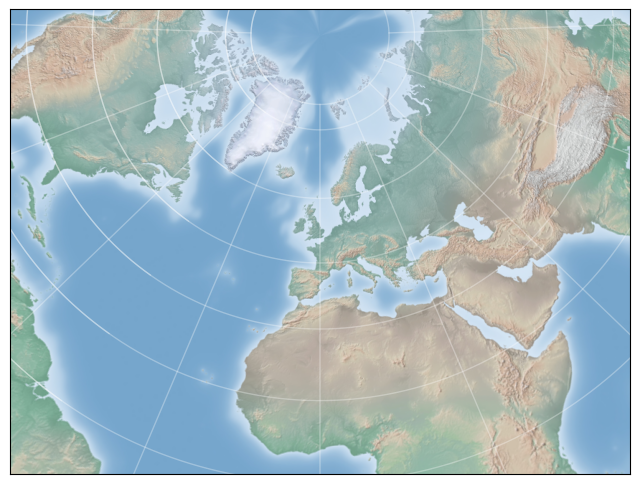

In [ ]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            lon_0=0, lat_0=50, lat_1=45, lat_2=55,
            width=1.6E7, height=1.2E7)
draw_map(m)

### Drawing a Map Background

Earlier we saw the bluemarble() and shadedrelief() methods for projecting global images on the map, as well as the drawparallels() and drawmeridians() methods for drawing lines of constant latitude and longitude. The Basemap package contains a range of useful functions for drawing borders of physical features like continents, oceans, lakes, and rivers, as well as political boundaries such as countries and US states and counties. The following are some of the available drawing functions that you may wish to explore using IPython’s help features:

Physical boundaries and bodies of water
drawcoastlines(): Draw continental coast lines
drawlsmask(): Draw a mask between the land and sea, for use with projecting images on one or the other
drawmapboundary(): Draw the map boundary, including the fill color for oceans.
drawrivers(): Draw rivers on the map
fillcontinents(): Fill the continents with a given color; optionally fill lakes with another color
Political boundaries
drawcountries(): Draw country boundaries
drawstates(): Draw US state boundaries
drawcounties(): Draw US county boundaries
Map features
drawgreatcircle(): Draw a great circle between two points
drawparallels(): Draw lines of constant latitude
drawmeridians(): Draw lines of constant longitude
drawmapscale(): Draw a linear scale on the map
Whole-globe images
bluemarble(): Project NASA’s blue marble image onto the map
shadedrelief(): Project a shaded relief image onto the map
etopo(): Draw an etopo relief image onto the map
warpimage(): Project a user-provided image onto the map
For the boundary-based features, you must set the desired resolution when creating a Basemap image. The resolution argument of the Basemap class sets the level of detail in boundaries, either 'c' (crude), 'l' (low), 'i' (intermediate), 'h' (high), 'f' (full), or None if no boundaries will be used. This choice is important: setting high-resolution boundaries on a global map, for example, can be very slow.

OSError: Unable to open boundary dataset file. Only the 'crude', 'low' and 'intermediate' resolution datasets are installed by default. If you are requesting a 'high' or 'full' resolution dataset, you need to install the `basemap-data-hires` package

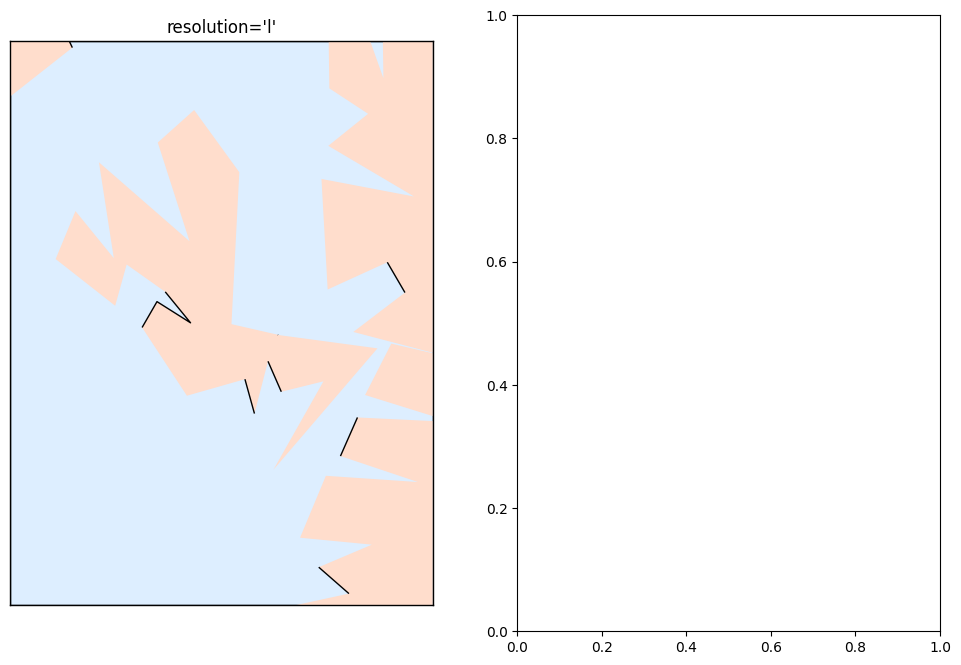

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))

for i, res in enumerate(['l', 'h']):
    m = Basemap(projection='gnom', lat_0=57.3, lon_0=-6.2,
                width=90000, height=120000, resolution=res, ax=ax[i])
    m.fillcontinents(color="#FFDDCC", lake_color='#DDEEFF')
    m.drawmapboundary(fill_color="#DDEEFF")
    m.drawcoastlines()
    ax[i].set_title("resolution='{0}'".format(res))

### Plot Data on Maps

Some of these map-specific methods are:

- contour()/contourf() : Draw contour lines or filled contours
- imshow(): Draw an image
- pcolor()/pcolormesh() : Draw a pseudocolor plot for irregular/regular meshes
- plot(): Draw lines and/or markers.
- scatter(): Draw points with markers.
- quiver(): Draw vectors.
- barbs(): Draw wind barbs.
- drawgreatcircle(): Draw a great circle.

### Plotting Carlifonia Cities Data 

In [ ]:
cities = pd.read_csv('data/california_cities.csv')

# Extract the data we're interested in
lat = cities['latd'].values
lon = cities['longd'].values
population = cities['population_total'].values
area = cities['area_total_km2'].values

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\HP ELITEBOOK 840 G6\AppData\Local\Temp\ipykernel_14972\3185914706.py:1: SyntaxWarning: invalid escape sequence '\D'
  cities = pd.read_csv('C:\DATA ANALYTICS\PYDATA\california_cities.csv')
C:\Users\HP ELITEBOOK 840 G6\AppData\Local\Temp\ipykernel_14972\3185914706.py:1: SyntaxWarning: invalid escape sequence '\D'
  cities = pd.read_csv('C:\DATA ANALYTICS\PYDATA\california_cities.csv')


NameError: name 'pd' is not defined

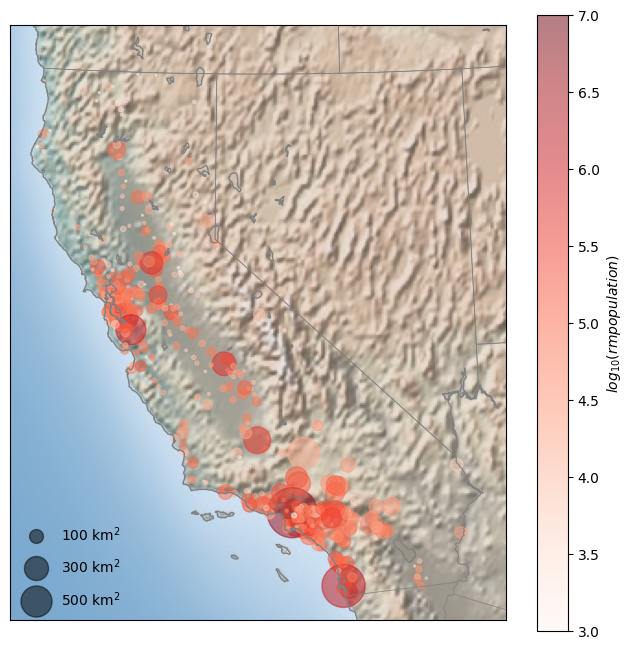

In [ ]:
# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=37.5, lon_0=-119,
            width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True,
          c=np.log10(population), s=area,
          cmap='Reds', alpha=0.5)

# 3. create colorbar and legend
plt.colorbar(label=r'$log_{10}({rm population})$')
plt.clim(3, 7)

# make legend with dummy points
for a in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.5, s=a,
                label=str(a) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left')

### Visualizing Surface Temp Data

In [ ]:
# data = Dataset('gistemp250.nc')

In [ ]:
# 1. Load the same city data
cities = pd.read_csv('data/california_cities.csv')
cities.head()



Unnamed: 0         city       latd       longd  elevation_m  elevation_ft  \
0           0     Adelanto  34.576111 -117.432778        875.0        2871.0   
1           1  AgouraHills  34.153333 -118.761667        281.0         922.0   
2           2      Alameda  37.756111 -122.274444          NaN          33.0   
3           3       Albany  37.886944 -122.297778          NaN          43.0   
4           4     Alhambra  34.081944 -118.135000        150.0         492.0   

   population_total  area_total_sq_mi  area_land_sq_mi  area_water_sq_mi  \
0             31765            56.027           56.009             0.018   
1             20330             7.822            7.793             0.029   
2             75467            22.960           10.611            12.349   
3             18969             5.465            1.788             3.677   
4             83089             7.632            7.631             0.001   

   area_total_km2  area_land_km2  area_water_km2  area_water_percent  
0         145.107        145.062           0.046                0.03  
1          20.260         20.184           0.076                0.37  
2          59.465         27.482          31.983               53.79  
3          14.155          4.632           9.524               67.28  
4          19.766         19.763           0.003                0.01

In [ ]:
# 2. Create a map object, centered on California
# We provide a starting latitude and longitude and a zoom level.
m = folium.Map(location=[37.5, -119], zoom_start=6)

# 3. Loop through each city in the data and add a marker to the map
for index, city in cities.iterrows():
    # Define the location for the marker
    location = [city['latd'], city['longd']]
    
    # Create a popup message that appears when you click the marker
    popup_text = f"""
                 <b>{city['city']}</b><br>
                 Population: {city['population_total']:,}<br>
                 Area: {city['area_total_km2']:.2f} km²
                 """
    
    # Choose a radius for the circle based on the city's area
    # We take the square root to make the sizes more comparable
    radius = city['area_total_km2']**0.5 * 100 
    
    # Add a CircleMarker to the map
    folium.CircleMarker(
        location=location,
        radius=radius / 50, # Scale down radius for better visuals
        popup=popup_text,
        color='crimson',
        fill=True,
        fill_color='crimson',
        fill_opacity=0.6
    ).add_to(m)

m 